# Assignment 1
### This notebook implements testing of the results on the holdout set of data for five
### models with the two datasets.
These two datasets look at Diabetes health predictors and Airline Passenger Satisfaction.
The files that we used are prepared by the Assignment1-DataAnalysis.ipynb notebook. 

Here we take the trained models from the Assignment1-Training.ipynb notebook and 

### Airline Passenger 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sn
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from sklearn.exceptions import ConvergenceWarning
import warnings
import pickle
import graphviz
from sklearn import tree

In [ ]:
def plot_roc_det_curves(classifiers,X_test,y_test):
    fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

    for clf in classifiers:

        RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=clf.__class__.__name__)
        DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=clf.__class__.__name__)

    ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
    ax_det.set_title("Detection Error Tradeoff (DET) curves")

    ax_roc.grid(linestyle="--")
    ax_det.grid(linestyle="--")

    plt.legend()
    plt.show()

In [3]:
font = {'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)

In [6]:
airline_data = pd.read_csv('./airline_data_test.csv',index_col=0)
airline_data = pd.read_csv('./airline_data_test_business.csv',index_col=0)

In [7]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17980 entries, 0 to 25974
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             17980 non-null  float64
 1   Customer Type                      17980 non-null  float64
 2   Age                                17980 non-null  float64
 3   Type of Travel                     17980 non-null  float64
 4   Class                              17980 non-null  float64
 5   Flight Distance                    17980 non-null  float64
 6   Inflight wifi service              17980 non-null  float64
 7   Departure/Arrival time convenient  17980 non-null  float64
 8   Ease of Online booking             17980 non-null  float64
 9   Gate location                      17980 non-null  float64
 10  Food and drink                     17980 non-null  float64
 11  Online boarding                    17980 non-null  flo

In [8]:
airline_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.75,...,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462,1.0
1,0.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.00,...,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000,1.0
2,1.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.75,...,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0
3,1.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.25,...,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381,1.0
4,0.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.50,...,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937,1.0


In [10]:
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.75,...,0.50,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462
1,0.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.00,...,1.00,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000
2,1.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.75,...,0.25,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000
3,1.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.25,...,0.75,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381
4,0.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.50,...,0.25,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1.0,1.0,0.576923,1.0,1.0,0.050283,0.6,0.6,0.6,0.50,...,0.75,0.8,0.8,0.8,0.75,0.50,0.8,0.6,0.000000,0.000000
25970,0.0,0.0,0.371795,1.0,0.0,0.080977,0.2,1.0,0.2,0.50,...,0.75,0.8,1.0,0.4,1.00,0.25,0.6,0.8,0.000000,0.000000
25971,1.0,0.0,0.346154,1.0,1.0,0.099960,0.6,0.6,0.6,0.00,...,0.75,0.8,0.6,0.4,0.75,0.75,1.0,0.8,0.000000,0.000000
25972,1.0,1.0,0.205128,1.0,1.0,0.124192,0.8,0.8,0.8,0.75,...,0.75,0.8,0.8,1.0,1.00,1.00,1.0,0.8,0.000000,0.000000


In [9]:
X = airline_data
y = X['satisfaction']
X = X[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]


In [11]:
y

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
25969    1.0
25970    0.0
25971    0.0
25972    1.0
25974    1.0
Name: satisfaction, Length: 17980, dtype: float64

# Read airline models and run tests to score

In [12]:
# Airline models

In [13]:
with open('best_search_decision_airline.pkl', 'rb') as f:
    best_search_decision_airline = pickle.load(f)
with open('best_search_boosted_airline.pkl', 'rb') as f:
    best_search_boosted_airline = pickle.load(f)
with open('best_search_knn_airline.pkl', 'rb') as f:
    best_search_knn_airline = pickle.load(f)
with open('best_search_svm_airline.pkl', 'rb') as f:
    best_search_svm_airline = pickle.load(f)
with open('best_search_nn_airline.pkl', 'rb') as f:
    best_search_nn_airline = pickle.load(f)

In [ ]:
plot_roc_det_curves([best_search_decision_airline, best_search_boosted_airline, best_search_knn_airline,best_search_svm_airline,best_search_nn_airline],X,y)

In [ ]:
classifiers = {
    'best_search_decision_airline': best_search_decision_airline, 
    'best_search_boosted_airline': best_search_boosted_airline, 
    'best_search_knn_airline': best_search_knn_airline,
    'best_search_svm_airline': best_search_svm_airline,
    'best_search_nn_airline': best_search_nn_airline
}

## Now Diabetes Dataset

In [87]:

diabetes_data =  pd.read_csv('./diabetes_test_data.csv',index_col=0)



In [88]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56478 entries, 0 to 56477
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                56478 non-null  float64
 1   HighChol              56478 non-null  float64
 2   CholCheck             56478 non-null  float64
 3   BMI                   56478 non-null  float64
 4   Smoker                56478 non-null  float64
 5   Stroke                56478 non-null  float64
 6   HeartDiseaseorAttack  56478 non-null  float64
 7   PhysActivity          56478 non-null  float64
 8   Fruits                56478 non-null  float64
 9   Veggies               56478 non-null  float64
 10  HvyAlcoholConsump     56478 non-null  float64
 11  AnyHealthcare         56478 non-null  float64
 12  NoDocbcCost           56478 non-null  float64
 13  GenHlth               56478 non-null  float64
 14  MentHlth              56478 non-null  float64
 15  PhysHlth           

## Check for imbalanced dataset

In [89]:
## If forecasting diabetes, is the data imbalanced
diabetes_data['Diabetes_binary'].value_counts()

0.0    28239
1.0    28239
Name: Diabetes_binary, dtype: int64

In [90]:
diabetes_data.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [91]:
X = diabetes_data.sample(data_size_sample)
y = X['Diabetes_binary']
X = X[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]

In [92]:
y.value_counts()

0.0    25061
1.0    24939
Name: Diabetes_binary, dtype: int64

In [ ]:
plot_roc_det_curves([best_search_decision_diabetes, best_search_boosted_diabetes, best_search_knn_diabetes,best_search_svm_diabetes,best_search_nn_diabetes],X,y)

In [ ]:
classifiers = {
    'best_search_decision_diabetes': best_search_decision_diabetes, 
    'best_search_boosted_diabetes': best_search_boosted_diabetes, 
    'best_search_knn_diabetes': best_search_knn_diabetes,
    'best_search_svm_diabetes': best_search_svm_diabetes,
    'best_search_nn_diabetes': best_search_nn_diabetes
}

CPU times: user 7.24 s, sys: 0 ns, total: 7.24 s
Wall time: 7.24 s


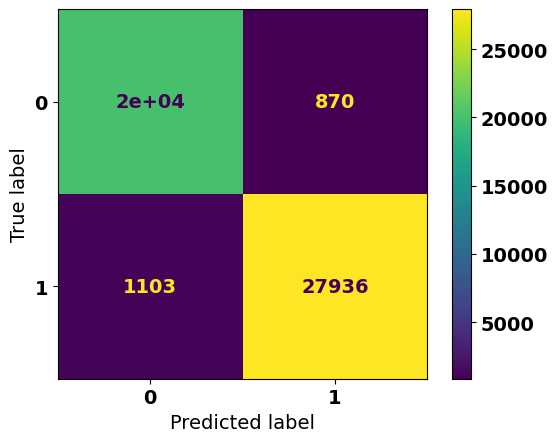

In [69]:
%%time
y_pred = model_search_cv.best_estimator_.predict(X)
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()